# Aggregations Min, Max, and Everything in Between

Usualmente cuando uno se encuentra con una gran cantidad de datos una primera etapa es realizar el computo de resumenes estadisticos de los datos que se disponen. Quizas los resumenes estadisticos mas comunes son la media y el desvio estandar, pero otros agregados tambien son utiles (la suma, producto, mediana, minimo y maximo, quantiles,etc)

## Summing the Values in an Array

In [29]:
import numpy as np #Importo NumPy en su forma habitual

In [2]:
L = np.random.random(100) #Genero un array de 100 numeros aleatorios

In [4]:
L #Visualizo el array

array([0.2710758 , 0.46248606, 0.30490568, 0.83305774, 0.28247685,
       0.07119496, 0.17138634, 0.15413569, 0.22373156, 0.26821394,
       0.96403233, 0.17491805, 0.69457144, 0.75505077, 0.71851165,
       0.26999423, 0.97154813, 0.9704206 , 0.35656491, 0.76705055,
       0.87673047, 0.86991751, 0.02153107, 0.25645181, 0.7064632 ,
       0.52430877, 0.56254215, 0.21088105, 0.28491741, 0.13474851,
       0.57966486, 0.24011991, 0.22298928, 0.07379604, 0.82351843,
       0.58811637, 0.35104816, 0.51926619, 0.19668285, 0.81357888,
       0.4454068 , 0.41097035, 0.10505903, 0.36643407, 0.32224334,
       0.92774229, 0.03857355, 0.95450264, 0.99900526, 0.80523018,
       0.99699641, 0.90388226, 0.82391825, 0.55371742, 0.08815467,
       0.3120537 , 0.92790568, 0.78362221, 0.51211327, 0.13798026,
       0.58600971, 0.39856028, 0.0083944 , 0.9443155 , 0.1009074 ,
       0.17119829, 0.04735763, 0.53263849, 0.83287095, 0.21991168,
       0.82979212, 0.10215945, 0.15680335, 0.28859223, 0.33461

In [5]:
#Realizo la suma de los elementos del array por medio del comando sum() de Python

sum(L) 

48.533463388122115

In [6]:
#Realizo la suma de los elementos del array por medio de np.sum() de NumPy

np.sum(L)

48.53346338812211

Segun se observa con los dos metodos (Python y NumPy) se obtienen iguales resultados. Sin embargo la suma por medio de NumPyes mucho mas rapido ya que ejecuta la operacion en codigo compilado. Esto lo podemos verificar trabajando con grandes arrays:

In [9]:
big_array = np.random.rand(1000000) #Creo un gran array de 1 millon de elementos

In [8]:
big_array #Visualizo la primera parte del gran array

array([0.64804407, 0.95651588, 0.80736327, ..., 0.2185086 , 0.34962715,
       0.39335871])

In [10]:
%timeit sum(big_array)
%timeit np.sum(big_array)

385 ms ± 69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.52 ms ± 44.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Segun se observa el calculo de suma por medio de NumPy es mucho mas rapido que la suma de Python

La funcion sum() de Python y la funcion np.sum() de NumPy NO son identicas. Los argumentos opcionales de ambas funciones difieren en significado.

## Minimum ans Maximum

In [13]:
#Python tiene funciones min() y max(), utilizadas para obtener el valor minimo y maximo de un array especifico:
#Obtengo los valores minimo y maximo del gran array

min(big_array), max(big_array)

(3.4192456377368785e-07, 0.9999988660823466)

In [15]:
#NumPy tiene funciones similares, las cuales nuevamente operan mucho mas rapido que las correspondientes en Python

np.min(big_array), np.max(big_array)

(3.4192456377368785e-07, 0.9999988660823466)

In [16]:
#Comparativa de tiempos de ejecucion para obtener el valor minimo:

%timeit min(big_array)
%timeit np.min(big_array)

243 ms ± 9.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
852 µs ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
#Comparativa de tiempos de ejecucion para obtener el valor maximo:

%timeit max(big_array)
%timeit np.max(big_array)

197 ms ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
826 µs ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Para min(), max(), sum() y otros agregados de NumPy se puede utilizar una sintaxis mas corta por medio del uso de metodos en el objeto array:

In [18]:
print(big_array.min(),big_array.max(),big_array.sum())

3.4192456377368785e-07 0.9999988660823466 499110.88952498167


### Multidimensional aggregates

Un tipo comun de operacion de agregado es un agregado a lo largo de una fila o columna

In [20]:
#Creo un array 2D 3x4 de numeros aleatorios

M = np.random.random((3,4))

In [22]:
M #Visualizo el array 3x4 creado

array([[0.262267  , 0.59546023, 0.78679149, 0.98695408],
       [0.16843896, 0.31028413, 0.35084321, 0.35495469],
       [0.52569749, 0.70258121, 0.95171366, 0.37326569]])

Por defecto cada agregado de NumPy retorna sobre el array entero:

In [23]:
M.sum() #Calculo la suma de todos los elementos del array 2D

6.3692518443025286

In [24]:
np.sum(M) #Otra forma de obtener la suma de todos los elementos del array 2D

6.3692518443025286

Las funciones de agregacion tienen la posibilidad de especificar un argumento adicional denominado "axis" a traves del cual el agregado es computado:

In [26]:
#Busco el valor minimo a traves de cada columna especificando axis=0
#Se retornan 4 valores, los cuales corresponden a los valores de las 4 columnas

M.min(axis=0)

array([0.16843896, 0.31028413, 0.35084321, 0.35495469])

In [28]:
#En forma similar podemos encontrar el valor maximo de cada fila
#Se retornan 3 valores, los cuales corresponden a los valores de las 3 filas

M.max(axis=1)

array([0.98695408, 0.35495469, 0.95171366])

La forma en que "axis" (eje) es especificado puede resultar en confusion con respecto a otros lenguajes de programacion: La palabra clave "Axis" especifica LA DIMENSION DEL ARRAY QUE SERA COLAPSADO y no la dimension que se retornara.

Ejemplo: Especificando axis=0 significa que el primer eje sera colapsado, lo cual para un array 2D esto significa que el valor de cada columna sera agregado

### Other aggregation functions

NumPy provee muchas otras funciones de agregacion. Muchas de estas tienen su contraparte "NaN-Safe" que computa los resultados mientras ignora los valores perdidos (NaN value)

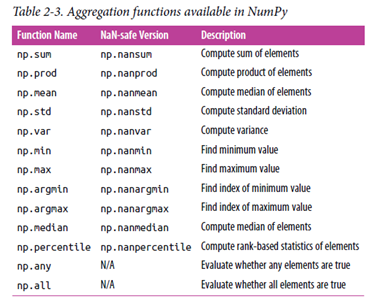